[Source](https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f)

In [ ]:
import pandas as pd
import numpy as np
import numpy.typing as npt
from typing import *
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Advertising.csv')
df.head()

In [2]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [3]:
X = df[["TV", "radio", "newspaper"]]
Y = df["sales"]
yMean = Y.mean()
yStd = Y.std()

In [4]:
Y = np.array((Y - yMean) / yStd)

In [5]:

X = X.apply(lambda col: (col - col.mean()) / col.std(), axis=0)

In [6]:
X


,TV,radio,newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


# y = beta + theta . X

### We cannot do a gradient descent on RMSE as it does not conserve the sign of the error! So, we need instead of root mean squared error, we use mean squared error.
 There can be two different averaging algorithms: one is to get the mean error and multiply by the sum of gradients and divide by n. Another approach is for each weight, dot the errors with the respective gradient vector and then get the average of that. The latter makes more sense as we are computing the derivative of the error for each data point.

In [107]:
def initWeights(dim: int) -> Tuple[float, npt.NDArray]:
    beta = (np.random.rand() - 0.5) * 2
    theta = (np.random.rand(dim) - 0.5) * 2
    return beta, theta

def predictNorm(X, beta, theta) -> float:
    yNorm = beta + np.dot(X, theta)
    return yNorm

def unnormalise(yNorm) -> float:
    return (yNorm * yStd) + yMean

def rmse(Y: npt.NDArray, Y_hat: npt.NDArray) -> float:
    residual = Y_hat - Y 
    sqm = np.dot(residual.T, residual) / len(Y)
    root = np.sqrt(sqm)
    return root

def error(Y: npt.NDArray, Y_hat: npt.NDArray) -> float:
    residual = Y_hat - Y 
    return np.sum(residual) / len(Y)

def gd(X: npt.NDArray, LR: float, Y: npt.NDArray, Y_hat: npt.NDArray, beta0, theta0) -> Tuple[float, npt.NDArray]:
    clipThreshold = 1
    n = len(Y)
    error = Y_hat - Y
    # sqem = np.dot(error.T, error) / n # mean squared error
    # print("sqem", sqem)
    # sqem = np.sum(np.square(error)) / n  # mean squared error
    # print("sqem", sqem)

    
    
    # derivative of squared error = 2 * error * gradient.
    
    # dEdBeta = 0.5 * sqem # by chaining
    dEdBeta = 2 * np.sum(error) / n # averaging by n. Using mean squared error instead of RMSE as the derivative has a sign.
    
    # now for each component of theta0, we need 0.5 * sqm * (sum of gradients for that component, i.e., for theta_1, we need x11 + x21 + .
    gradients = np.sum(X, axis=0) 
    
    # dEdTheta = 0.5 * sqem * gradients # we get partial derivatives of all the components
    dEdTheta = 2 * np.dot(error, X) / n # e1x11 + e2x21 + e3x31...., e1x12 + e2x22 + e3x32, ...)
    # print("dEdBeta", dEdBeta)
    # print("gradients", gradients)
    # print("dEdTheta", dEdTheta)
    
    # update rule 
    beta = beta0 - LR * dEdBeta
    if beta > clipThreshold:
        beta = clipThreshold
        
    if beta < -clipThreshold:
        beta = -clipThreshold
        
    theta = theta0 - LR * dEdTheta
    
    theta = np.clip(theta, -clipThreshold, clipThreshold)
    
    return beta, theta
    

    

## SGD vs GD vs Mini Batch

SGD is on single data points. Easier to implement. GD is on the whole dataset. After each epoch on the whole dataset, we get an average of the derivative.


## GD

In [108]:
beta, theta = initWeights(3)

In [109]:
print(beta, theta)

0.7164522186277411 [-0.55138869 -0.37097755 -0.45018769]


In [110]:
XNp = X.to_numpy()
Y_hat = predictNorm(XNp, beta, theta)

In [111]:
Y_hat[0]

-0.9790408118010194

In [112]:
rmse(Y, Y_hat)

1.9507975224099698

In [113]:
beta, theta = gd(XNp, 0.01, Y, Y_hat, beta, theta)
print(beta, theta)

0.7021231742551863 [-0.52393768 -0.34835455 -0.43345007]


In [93]:
# n = len(XNp)
# print(n)
# np.dot(np.ones(n), XNp)

In [94]:
# np.sum(XNp, axis=0)

In [148]:
# Training Loop
beta, theta = initWeights(3)
loss = []
for i in range(1000):
    Y_hat = predictNorm(XNp, beta, theta)
    rms = rmse(Y, Y_hat)
    if np.isnan(rms):
        break

    loss.append(rms)
    beta, theta = gd(XNp, 0.001, Y, Y_hat, beta, theta)
# loss

<Axes: >

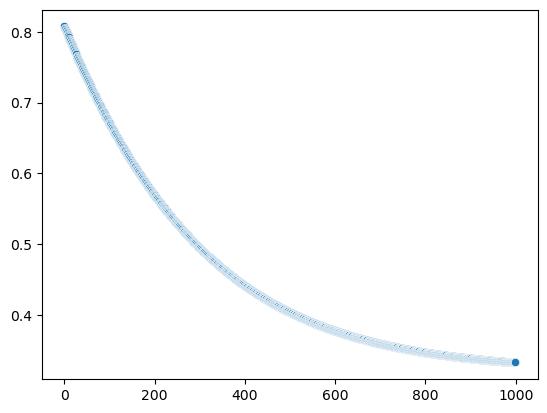

In [149]:

sns.scatterplot(loss)

In [141]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [124]:
YPredicted = unnormalise(Y_hat)

In [125]:
YPredicted[:5]

array([20.52398025, 12.33785184, 12.30767274, 17.59783002, 13.18868749])

In [127]:
loss[-1]

0.31980527671462733

# SGD

In this approach, we will sample a data point, and update the weight on it. We will use the same methods but with single datapoints

In [135]:
# Training Loop
beta, theta = initWeights(3)
loss = []
n = len(XNp)
for _ in range(1000):
    Y_hat = predictNorm(XNp, beta, theta)
    rms = rmse(Y, Y_hat)
    if np.isnan(rms):
        break
    loss.append(rms)
    
    sampleIdx = np.random.randint(0, n)
    x = XNp[sampleIdx: sampleIdx+1]
    y = Y[sampleIdx: sampleIdx+1]
    y_hat = Y_hat[sampleIdx: sampleIdx+1]
    beta, theta = gd(x, 0.001, y, y_hat, beta, theta)
# loss

<Axes: >

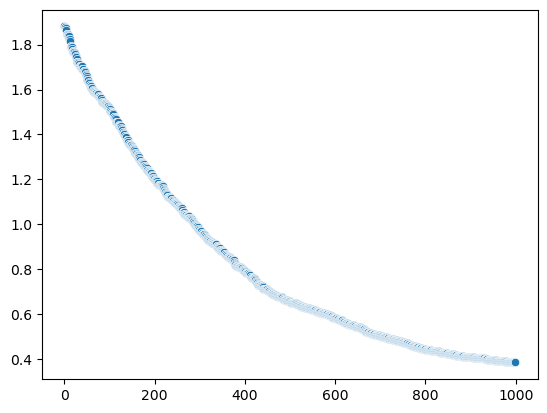

In [136]:

sns.scatterplot(loss)

# Mini Batch (without shuffling)

In [ ]:
def getBatch(idx, batchSize, X, Y, Y_hat) -> Tuple[npt.NDArray, npt.NDArray, npt.NDArray]:
    nBatches = len(X) // batchSize
    idx = idx % nBatches
    startIdx = idx * batchSize
    endIdx = (idx + 1) * batchSize
    x = XNp[startIdx: endIdx]
    y = Y[startIdx: endIdx]
    y_hat = Y_hat[startIdx: endIdx]
    
    return x, y, y_hat
    
    

# Training Loop
beta, theta = initWeights(3)
loss = []
n = len(XNp)
for _ in range(1000):
    Y_hat = predictNorm(XNp, beta, theta)
    rms = rmse(Y, Y_hat)
    if np.isnan(rms):
        break
    loss.append(rms)
    
    x, y, y_hat = getBatch(
    beta, theta = gd(x, 0.001, y, y_hat, beta, theta)
# loss

In [ ]:
sns.scatterplot(loss)